[1, 2, 3, 4, 5] [1, 4, 9, 16, 25]


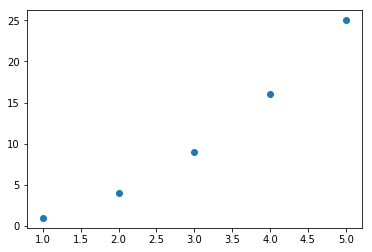

In [25]:
import pymongo
import pprint

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = [1, 2, 3, 4, 5]
b = [x ** 2 for x in a]

print(a, b)

plt.clf()

fig, ax = plt.subplots()
ax.scatter(a, b)

plt.show()

In [17]:
movies = client['mflix']['movies']

query = {
    'runtime': {"$exists": True},
    'metacritic': {"$exists": True}
}

projection = {
    '_id': 0,
    'runtime': 1,
    'metacritic': 1
}

rm = list(movies.find(query, projection))

pprint.pprint(rm[0])

{'metacritic': 98, 'runtime': 153}


In [23]:
runtimes = [movie['runtime'] for movie in rm]
metacritics = [movie['metacritic'] for movie in rm]

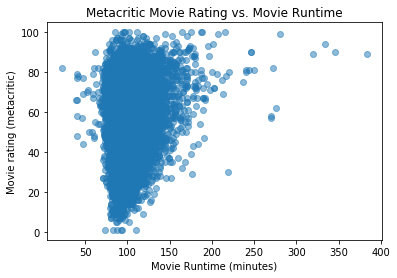

In [24]:
plt.clf()

fig, ax  = plt.subplots()
ax.scatter(runtimes, metacritics, alpha=0.5)

plt.title('Metacritic Movie Rating vs. Movie Runtime')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Movie rating (metacritic)')

plt.show()

In [34]:
query = {
'runtime': {"$exists": True},
'metacritic': {"$exists": True},
'year': {"$exists": True, '$type': "int"}
}

projection = {
'_id': 0,
'runtime': 1,
'metacritic': 1,
'year': 1
}

rmy = list(movies.find(query, projection))
pprint.pprint(rmy[0])


{'metacritic': 98, 'runtime': 153, 'year': 1927}


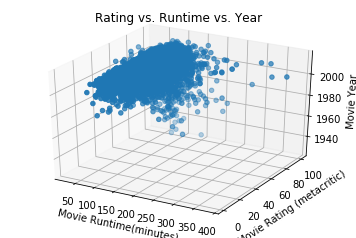

In [38]:
runtimes = [movie['runtime'] for movie in rmy]
metacritic_ratings = [movie['metacritic'] for movie in rmy]
years = [movie['year'] for movie in rmy]

plt.clf()

fig  = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(runtimes, metacritic_ratings, years)

plt.title('Rating vs. Runtime vs. Year')
ax.set_xlabel('Movie Runtime(minutes)')
ax.set_ylabel('Movie Rating (metacritic)')
ax.set_zlabel('Movie Year')

plt.show()

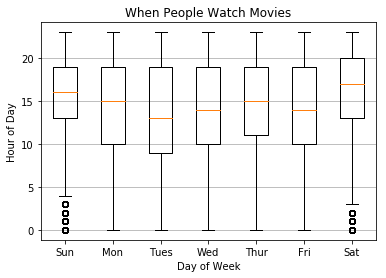

In [67]:
pings = client['mflix']['watching_pings']
cursor = pings.aggregate([
  {
    "$sample": { "size": 50000 }
  },
  {
    "$addFields": { 
      "dayOfWeek": { "$dayOfWeek": "$ts" },
      "hourOfDay": { "$hour": "$ts" }
    }
  },
  {
    "$group": { "_id": "$dayOfWeek", "pings": { "$push": "$$ROOT" } }
  },
  {
    "$sort": { "_id": 1 }
  }
]);
pings_by_day = [doc['pings'] for doc in cursor]
pings_by_hour_by_day = [[ping['hourOfDay'] for ping in pings] for pings in pings_by_day]
plt.clf()

fig, ax = plt.subplots()

ax.boxplot(pings_by_hour_by_day)

ax.set_title('When People Watch Movies')
ax.yaxis.grid(True)
ax.set_xticklabels(['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat'])
ax.set_xlabel('Day of Week')
ax.set_ylabel('Hour of Day')

plt.show()
